In [65]:
print,"Hello world, IDL is running"

Hello world, IDL is running

# Dev Notes, SolarSoft in a Jupyter Notebook
We set up SolarSoft with the Jupyter Notebook modifications. The IDLSSWtest.ipynb notebook gives working examples. This notebook demonstrates the problem, methods that do not work, and the underlying theory needed for developers.

---
---
# Underlying Theory and Backstory
Users can skip this documentation section, which describes the plotting issues for developers and underlying structure of the repairs.

## Failed Graphics Test
Why did we need this? IDL-in-Jupyter can only use the 'plot' and 'image' orject graphics functions, not the legacy 'plot' and 'tv' procedures; the older routines require XWindow calls that Jupyter cannot handle. To demonstrate, let's create an xwindow!  I'm sure nothing will go wrong!

In [50]:
window,0  ; THIS WILL FAIL ON JUPYTER

% WINDOW: Unable to connect to X Windows display: :0.0 % WINDOW: Unable to open X Windows display. Is your DISPLAY environment variable set correctly? % Execution halted at: $MAIN$

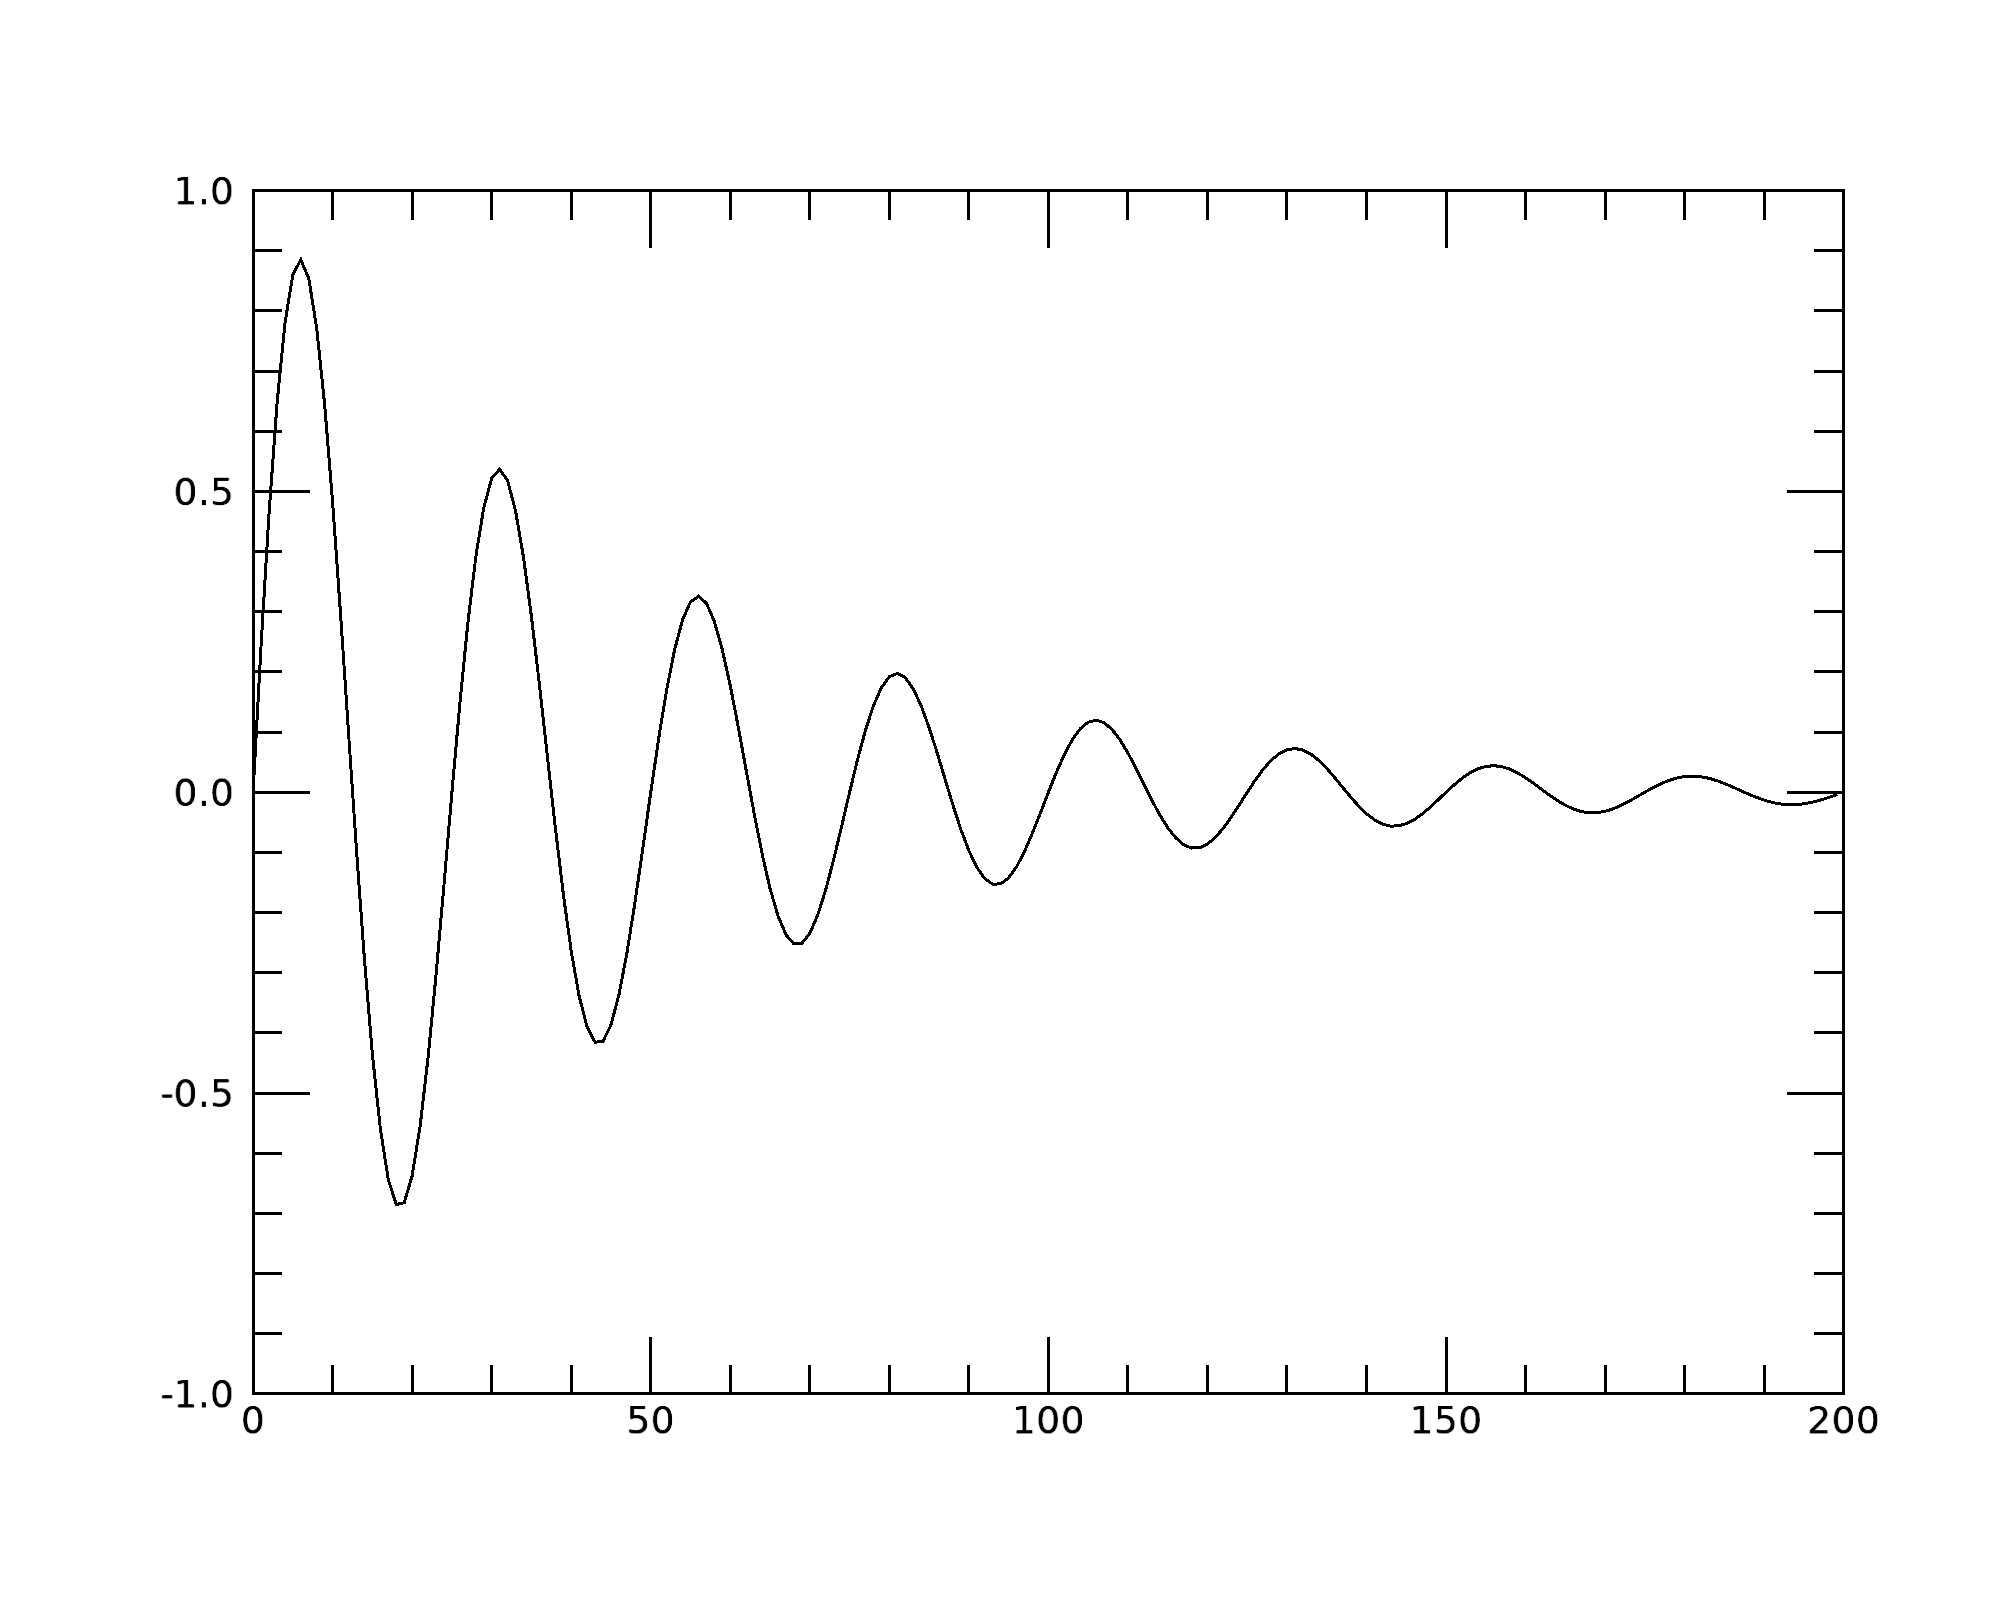

In [51]:
arr = Randomu(seed, 1000)
theory = SIN(2.0*[0:199]*!PI/25.0)*EXP(-0.02*[0:199])
p = plot(theory)

Well, that didn't work.  Don't worry, all our following examples will, that was to show the characteristic error message when Jupytering in IDL.

In [52]:
f=scclister()

menu = CW_PDMENU(lcol, pdm_desc, UVALUE = 'PDMENU', /RETURN_FULL_NAME) ^ % Syntax error. At: /home/jovyan/efs/solarsoft/stereo/secchi/idl/database/scclister.pro, Line 2563 % Attempt to call undefined function: 'SCCLISTER'. % Execution halted at: $MAIN$

In [53]:
base1 = WIDGET_BASE()

% WIDGET_BASE: Unable to connect to X Windows display: :0.0 % WIDGET_BASE: Unable to establish X Connection. % Execution halted at: $MAIN$

## Plotting in Jupyter (the proper way)

% Attempt to call undefined procedure: 'STYLE_CONVERT'. % Execution halted at: $MAIN$

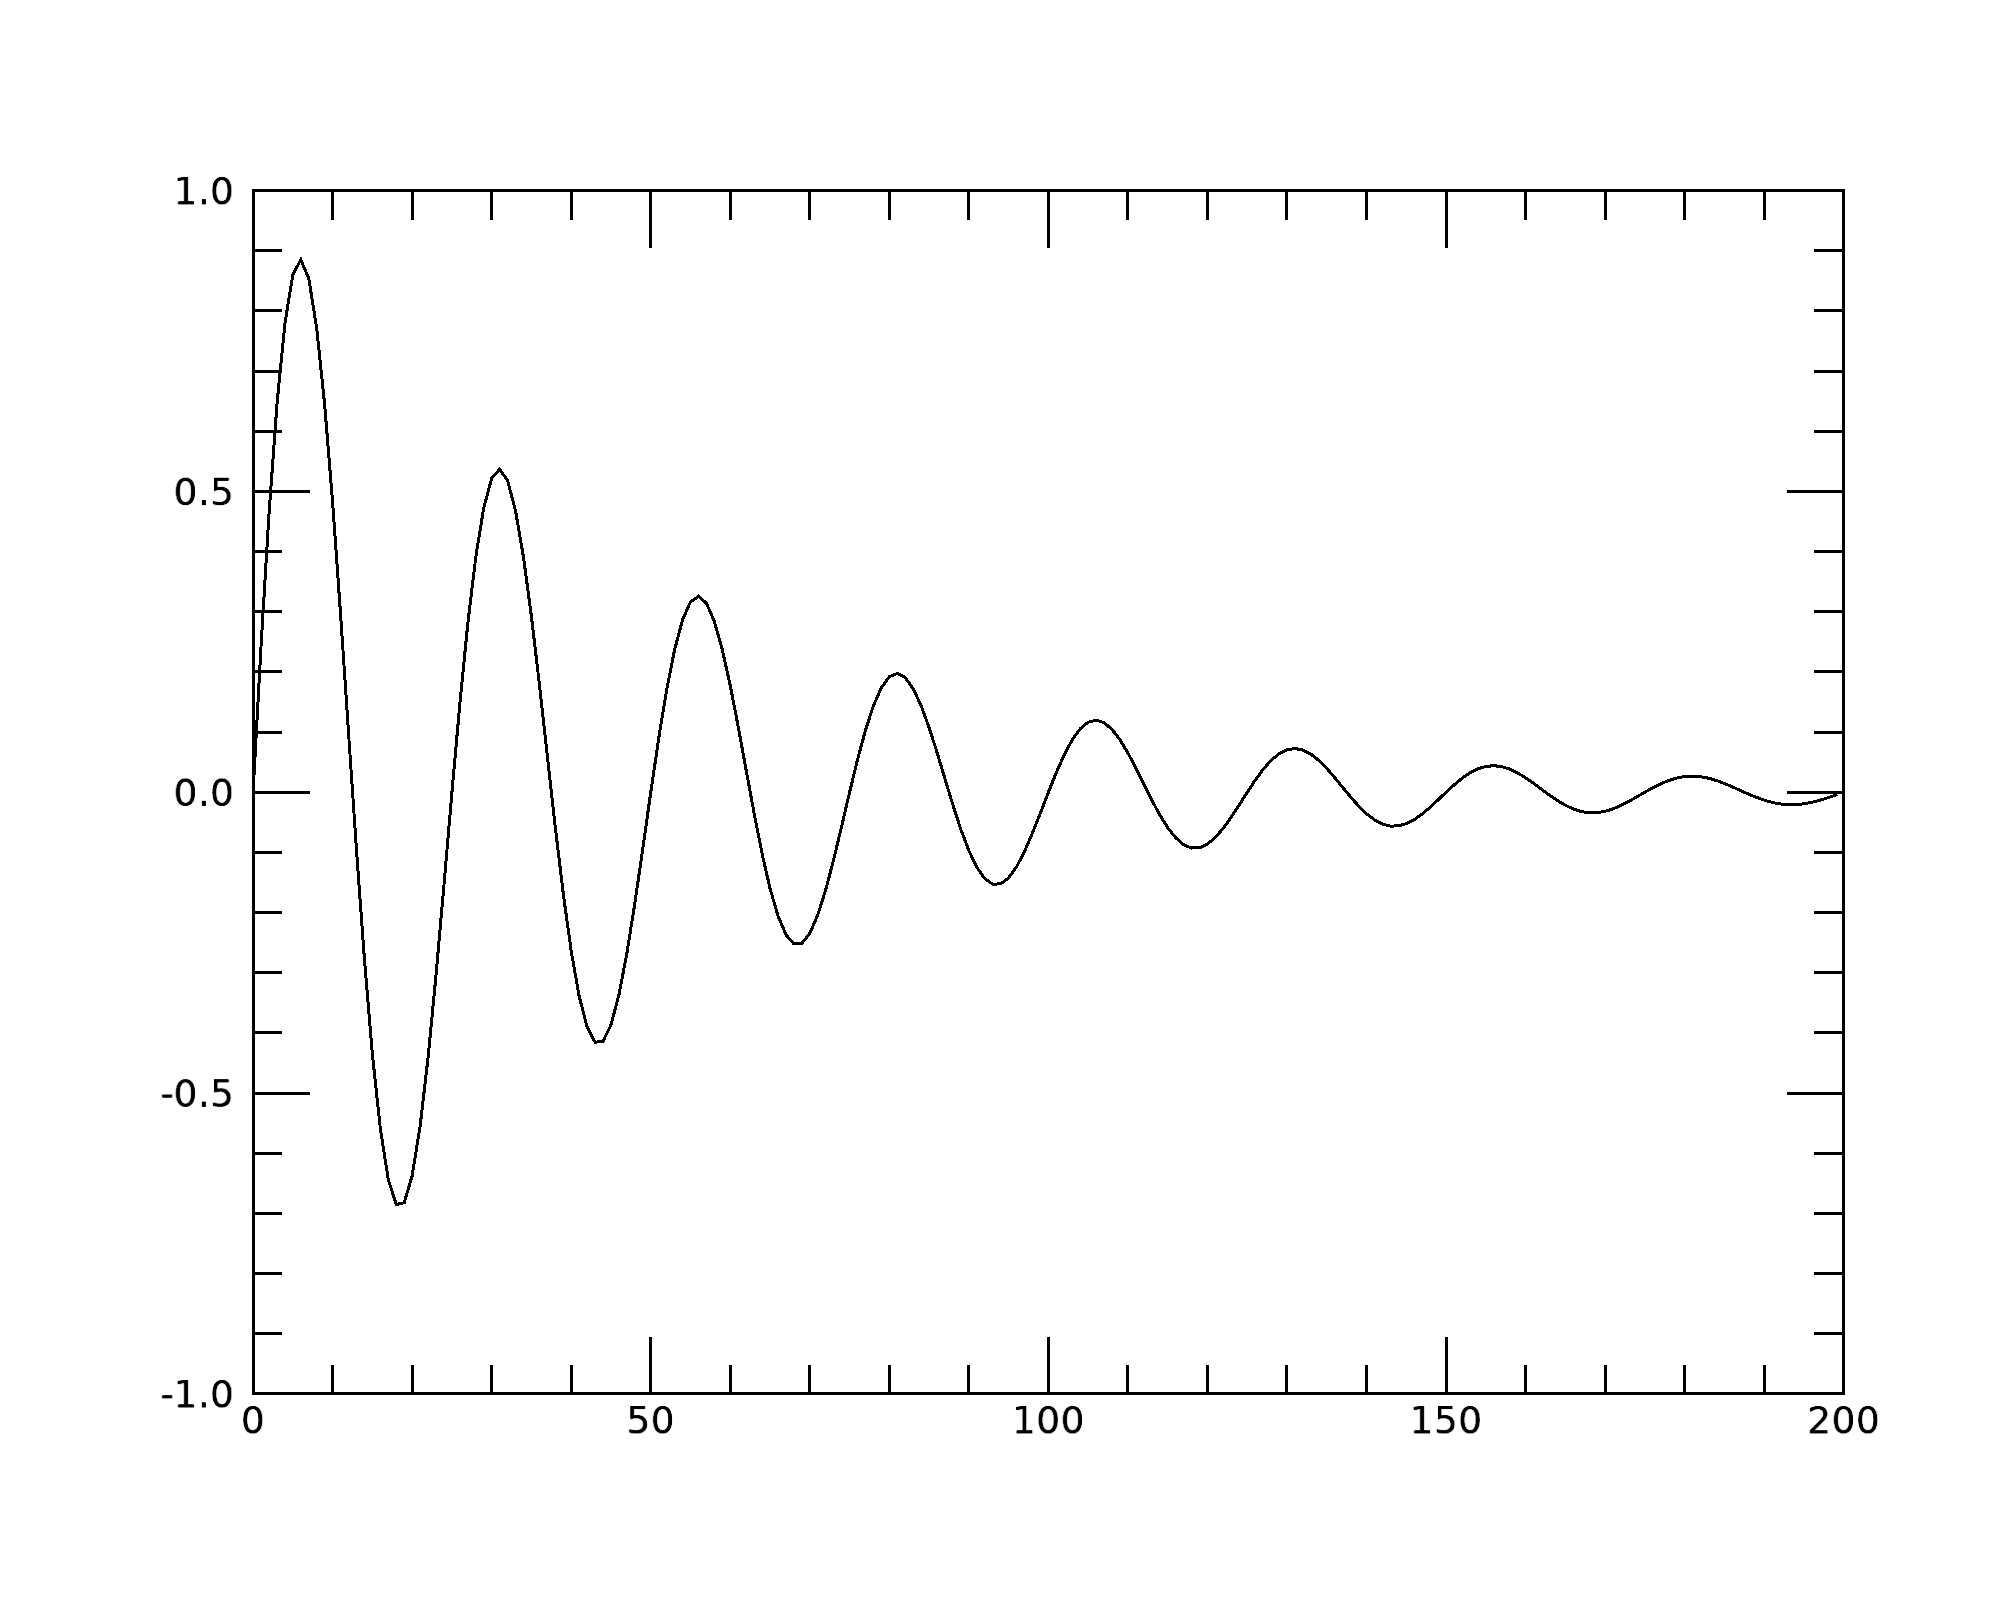

% Attempt to call undefined procedure: 'STYLE_CONVERT'. % Execution halted at: $MAIN$

% Attempt to call undefined procedure: 'STYLE_CONVERT'. % Execution halted at: $MAIN$

In [54]:
; example from https://www.l3harrisgeospatial.com/docs/idl_kernel.html
arr = Randomu(seed, 1000)
theory = SIN(2.0*[0:199]*!PI/25.0)*EXP(-0.02*[0:199])
; You can use the $ continuation character.
p = PLOT(theory, "r4D-", YTITLE='Resistance ($\Omega$)', TITLE="Circuit Resistance", DIM=[450,400], MARGIN=0.2)
p.SYM_INCREMENT = 5
p.SYM_COLOR = "blue"
p.SYM_FILLED = 1
p.SYM_FILL_COLOR = 0

In [55]:
d=shift(dist(256),128,128)
i=image(d,dimensions=[256,256])
print,'Done plotting image'

Done plotting image

## Setting up SSW environmental variables (tedious)
This next call, to the SSW 'prstr', will fail, but reveals a hidden toggle we can use!

In [ ]:
which,'prstr'
prstr,'hello world'

SSW has some hooks for non-X use, which we can now use.

In [ ]:
; SSW ANTICIPATED TERMINAL PROBLEMS, THIS MAKES JUPTYER WORK BETTER
setenv,'ssw_nomore=1'

Exact same call as before, only this time it will work.

In [ ]:
which,'prstr'
prstr,'hello world'

## More Setup
Now we set a LOT of SSW environmental variables.

In [ ]:
sswloc = '/home/jovyan/efs/solarsoft'
setenv,'SSW='+sswloc
setenv,'SSW_INSTR=gen stereo secchi psp festival s3drs lasco'
setenv,'SSWDB='+sswloc+'/sswdb'
setenv,'env_list='+sswloc+'/site/setup/setup.ssw_paths'
;setenv,'SSW_MISSIONS=soho yohkoh spartan trace cgro smm packages hessi radio optical hxrs smei goes goesr goesn hinode vobs stereo proba2 iris hic so psp'
setenv,'SSW_MISSION=soho packages stereo psp'
setenv,'SSW_SOHO_INSTR=soho/cds soho/eit soho/sumer soho/lasco soho/mdi soho/uvcs'
setenv,'SSW_STEREO_INSTR=stereo/impact stereo/plastic stereo/secchi stereo/swaves stereo/ssc'
setenv,'SSW_PSP_INSTR=psp/fields psp/isis psp/wispr psp/sweap'


In [ ]:
setenv,'SSW_PACKAGES_INSTR=packages/binaries packages/mjastereo packages/sbrowser packages/nrl packages/sunspice'
setenv,'SSW_INSTR_ALL=gen soho/cds soho/eit soho/sumer soho/lasco soho/mdi soho/uvcs yohkoh/bcs yohkoh/hxt yohkoh/sxt yohkoh/wbs spartan/spartan trace/trace smm/xrp smm/hxrbs smm/uvsp smm/cp smm/grs smm/cp smm/hxis smm/acrim cgro/batse hessi/hessi packages/binaries packages/chianti packages/spex packages/xray packages/goes packages/cdscat packages/ztools packages/lparl packages/ana packages/mjastereo packages/findstuff packages/vdem packages/andril packages/hydro packages/pfss packages/pdl packages/poa packages/ngdc packages/cmes packages/nlfff packages/cactus packages/spvm packages/sbrowser packages/tplot packages/festival packages/panorama packages/nrl packages/corimp packages/s3drs packages/mkit packages/helioviewer packages/azam packages/gx_simulator packages/swpc_cat packages/euvdeconpak packages/forward packages/desat packages/sunspice packages/mosic packages/cruiser packages/gsfit packages/dem_sites packages/catch packages/simple_reg_dem packages/demreg radio/ethz radio/fhnw radio/nrh radio/norh radio/eovsa radio/ovsa radio/ovro radio/norp radio/mwa radio/lofar optical/soon optical/lapalma optical/nso optical/mees hxrs/hxrs smei/smei goes/sxig12 goes/sxig13 goesr/suvi goesn/sxi hinode/eis hinode/xrt hinode/sot vobs/cosec vobs/egso vobs/vso vobs/ontology vobs/helio stereo/impact stereo/plastic stereo/secchi stereo/swaves stereo/ssc proba2/swap proba2/lyra sdo/aia sdo/hmi sdo/eve iris/iris hic/hic so/stix so/spice psp/fields psp/isis psp/wispr psp/sweap'

In [ ]:
setenv,'SSW_PACKAGES='+sswloc+'/packages'
setenv,'SSW_BINARIES='+sswloc+'/packages/binaries'
setenv,'SSW_MJASTEREO='+sswloc+'/packages/mjastereo'
setenv,'SSW_SBROWSER='+sswloc+'/packages/sbrowser'
setenv,'SSW_NRL='+sswloc+'/packages/nrl'
setenv,'SSW_SUNSPICE='+sswloc+'/packages/sunspice'

In [ ]:
setenv,'SSW_PACKAGES_ALL='+sswloc+'/packages/binaries '+sswloc+'/packages/mjastereo '+sswloc+'/packages/nrl '+sswloc+'/packages/sbrowser '+sswloc+'/packages/sunspice'

In [ ]:
setenv,'SSW_SETUP='+sswloc+'/gen/setup'
setenv,'SSW_GEN_SETUP='+sswloc+'/gen/setup'
setenv,'SSW_SETUP_DATA='+sswloc+'/gen/setup/data'
setenv,'SSW_BIN='+sswloc+'/gen/bin'
setenv,'SSW_GEN_DATA='+sswloc+'/gen/data'
setenv,'DIR_GEN_SPECTRA='+sswloc+'/gen/data/spectra'
setenv,'SSW_SITE_LOGS='+sswloc+'/site/logs'
setenv,'SSW_SITE_SETUP='+sswloc+'/site/setup'
setenv,'SSW_SITE_MIRROR='+sswloc+'i/site/mirror'
setenv,'TIME_CONV='+sswloc+'/gen/data/time'
setenv,'SSW_LIBRARIES='+sswloc+'/gen/idl_libs'
setenv,'IDL_SSWASTRON='+sswloc+'/gen/idl_libs/astron'
setenv,'SSW_PERL='+sswloc+'/gen/perl'
setenv,'SSW_URL_GET='+sswloc+'/gen/perl/url_get'
setenv,'ssw_contrib_master=sohoftp.nascom.nasa.gov'
setenv,'SSW_HELP='+sswloc+'/gen/idl/help'
setenv,'ZDBASE_SOHO='+sswloc+'/soho/gen/data/plan/database'
setenv,'ZDBASE='+sswloc+'/soho/gen/data/plan/database'
setenv,'SOHO_CAP='+sswloc+'/soho/gen/data/plan/soho_cap'
setenv,'SOHO_SPICE_GEN='+sswloc+'/soho/gen/data/spice'


In [ ]:
setenv,'STEREO_SPICE='+sswloc+'/stereo/gen/data/spice'
setenv,'STEREO_SPICE_GEN='+sswloc+'/stereo/gen/data/spice/gen'
setenv,'STEREO_SPICE_SCLK='+sswloc+'/stereo/gen/data/spice/sclk'
setenv,'STEREO_SPICE_ATTIT_SM='+sswloc+'/stereo/gen/data/spice/ah'
setenv,'STEREO_SPICE_EPHEM='+sswloc+'/stereo/gen/data/spice/epm'
setenv,'STEREO_SPICE_DEF_EPHEM='+sswloc+'/stereo/gen/data/spice/depm'
setenv,'STEREO_SPICE_OTHER='+sswloc+'/stereo/gen/data/spice/other'
setenv,'STEREO_SPICE_ATTITUDE='+sswloc+'/stereo/gen/spice/ah'
setenv,'SOLO_SUNSPICE='+sswloc+'/so/gen/data/sunspice'
setenv,'PSP_SPICE='+sswloc+'/psp/gen/data/spice'


In [ ]:
setenv,'SSW_GEN='+sswloc+'/gen'
setenv,'SSW_CDS='+sswloc+'/soho/cds'
setenv,'SSW_EIT='+sswloc+'/soho/eit'
setenv,'SSW_SUMER='+sswloc+'/soho/sumer'
setenv,'SSW_LASCO='+sswloc+'/soho/lasco'
setenv,'SSW_MDI='+sswloc+'/soho/mdi'
setenv,'SSW_UVCS='+sswloc+'/soho/uvcs'
setenv,'SSW_IMPACT='+sswloc+'/stereo/impact'
setenv,'SSW_PLASTIC='+sswloc+'/stereo/plastic'
setenv,'SSW_SECCHI='+sswloc+'/stereo/secchi'
setenv,'SSW_SWAVES='+sswloc+'/stereo/swaves'
setenv,'SSW_SSC='+sswloc+'/stereo/ssc'
setenv,'SSW_ISIS='+sswloc+'/psp/isis'
setenv,'SSW_WISPR='+sswloc+'/psp/wispr'
setenv,'SSW_SWEAP='+sswloc+'/psp/sweap'
setenv,'SCC_DATA='+sswloc+'/stereo/secchi/data'
setenv,'PT='+sswloc+'/stereo/secchi/data/PT'
setenv,'SECCHI_CAL='+sswloc+'/stereo/secchi/calibration'
setenv,'SECCHI_LIB='+sswloc+'/stereo/secchi/lib'
setenv,'EUVI_RESPONSE='+sswloc+'/stereo/secchi/calibration/euvi_response'
setenv,'LASCO_EPHEMERIS='+sswloc+'/soho/lasco/idl/astrometry/ephemeris'
setenv,'LASCO_EXTERNAL='+sswloc+'/soho/lasco/idl/astrometry/external'
setenv,'LASCO_CATALOGS='+sswloc+'/soho/lasco/idl/astrometry/catalogs'
setenv,'HOMED='+sswloc+'/soho/lasco/idl/display'
setenv,'LASCO_DATA='+sswloc+'/soho/lasco/idl/data'
setenv,'EIT_DEGRID='+sswloc+'/soho/lasco/idl/nrleit/data/eit_degrid'


All of this is embedded in the jssw_setup.pro file, the same way we already use csh/bash/sh scripts.  Here's an example script that simply sets the environmental variable 'TESTPERSIST=42'

In [ ]:
.com set_test
set_test
print,getenv('TESTPERSIST')

## More Sanity Checks

In [ ]:
print,(fstat(0)).isagui

In [ ]:
print,getenv('SSWDB')

In [ ]:
.com testj ; compiling a local file I made

## Appendix: Using CDASWeb in IDL

"The CDF plotting routines available here underlie the CDAWeb software; they are supplied here in a package of IDL functions and procedures called CDAWlib."

https://spdf.gsfc.nasa.gov/CDAWlib.html

In [ ]:
;ipm, /install, 'https://cdaweb.gsfc.nasa.gov/WebServices/REST/SPDF_CDAS.zip'
restore, !package_path + '/SPDF_CDAS/spdfcdas.sav'

In [ ]:
; CDAS example
cdas = obj_new('SpdfCdas')

In [ ]:
groups = cdas.getObservatoryGroups()
foreach group, groups[0:3] do print, group.getName()

In [ ]:
instrTypes = cdas.getInstrumentTypes()
foreach instrType, instrTypes do print, instrType.getName()

In [ ]:
print,!version.release
print,groups[0].getName()
print,instrTypes[16].getName()

In [ ]:
datasets = cdas.getDatasets(observatoryGroups=[groups[0].getName()], instrumentTypes=[instrTypes[16].getName()])


In [ ]:
datasets[-1].print

In [ ]:
inventory = cdas.getInventory(datasets[-1].getId())
foreach interval, inventory.getTimeIntervals() do interval.print

In [ ]:
names = cdas.getVariableNames(datasets[-1].getId())
print, names

In [ ]:
d = spdfgetdata('AC_H2_MFI', ['Magnitude' , 'BGSEc'], ['2009-06-01T00:00:00.000Z', '2009-06-03T00:00:00.000Z'])

In [ ]:
print,d.magnitude.dat

In [ ]:
; 3) DOI example
ds = cdas.getDatasets(idPattern='ISEE2_60SEC_MFI')
print, ds[0].getId(), ', DOI: ', ds[0].getDoi(), ', ', ds[0].getResourceId()
iseeVars = cdas.getVariableNames(ds[0].getId())
print, iseeVars[0:3]
iseeInventory = cdas.getInventory(ds[0].getId())
iseeIntervals = iseeInventory.getTimeIntervals()
iseeStop = iseeIntervals[-1].getStop()
iseeStart = iseeStop - 1.0
iseeData = spdfgetdata(ds[0].getDoi(), iseeVars[0:3], [iseeStart, iseeStop])

## Summary
SolarSoft works in Jupyter, however, all the plot/xyouts/image/tvscl calls need to be captured or re-routed.  The reason is:

1) SSW uses older graphing procedures.
2) Newer IDL deprecateds those in favor of new object-oriented graphics functions.
3) Jupyter cannot port back an XWindow and thus can't use the older procedures.
3) IDL's Jupyter implementation does support their newer objects.
5) Ergo, we have to adapt SSW to the newer IDL objects.

The current estimate is that's 7000 replacements (of which only 300 are 'tvscl').

We will start by introducing a 'J_tvscl.pro' that is a drop-in replacement for tvscl.pro, such that a simple word replace will work. It will use an environmental variable such that the default is 'tvscl as usual' (no change) but if 'Jupyter=True', uses the newer plotting functions.

See https://www.l3harrisgeospatial.com/Support/Maintenance-Detail/ArtMID/13350/ArticleID/15466/Hacking-Animations-on-Jupyter for similar work in this area by others, or stand by for more tutorial later.